## **Limpieza y Preprocesamiento de Datos**

### Preprocesamiento básico

In [67]:
# Importar las bibliotecas necesarias
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tabulate import tabulate
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [2]:
# Leemos las bases de datos
base_sia1 = pd.read_excel('Datos_Personales_Estudiantes_1.xlsx')
base_sia2 = pd.read_excel('Datos_Personales_Estudiantes_2.xlsx')
base_encuesta = pd.read_excel('Respuestas_Encuesta.xlsx')
base_sexo = pd.read_excel('Sexo_de_Estudiantes.xlsx')

In [3]:
# Mostrar columnas de cada base de datos
print('Informacion resultados encuesta:\n')
print(base_encuesta.info())
print('-------------------------------------------------------------------')
print('Informacion base 1 SIA:\n')
print(base_sia1.info())
print('-------------------------------------------------------------------')
print('Informacion base 2 SIA:\n')
print(base_sia2.info())
print('-------------------------------------------------------------------')
print('Informacion base 2 SIA:\n')
print(base_sexo.info())

Informacion resultados encuesta:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Marca temporal                                          152 non-null    datetime64[ns]
 1   Nombres                                                 152 non-null    object        
 2   Apellidos                                               152 non-null    object        
 3   Número de documento de identidad (sin puntos ni comas)  152 non-null    int64         
 4   Edad                                                    152 non-null    object        
 5   Carrera                                                 152 non-null    object        
 6   Horario de la Cátedra de Inducción                      152 non-null    object        
 7   Emociones positivas         

In [4]:
# Seleccionar solo columnas de interes de la base de datos 1 del SIA
columnas_seleccionar = ["DOCUMENTO", "COD_PROGRAMA_CURRICULAR", "PROGRAMA_CURRICULAR", "NOMBRES", "APELLIDOS",
                          "CORREO", "SUBACCESO", "PBM", "PUNTAJE_ADMISION", "GRUPO_ASIGNATURA"]

# Crea un nuevo DataFrame con las columnas seleccionadas
df_sia1 = base_sia1.loc[:, columnas_seleccionar]

In [5]:
# Seleccionar solo columnas de interes de la base de datos 2 del SIA
columnas_seleccionar = ["DOCUMENTO", "ESTRATO", "TIPCOLEGIO"]

# Crea un nuevo DataFrame con las columnas seleccionadas
df_sia2 = base_sia2.loc[:, columnas_seleccionar]

In [6]:
# Renombramos algunas variables para próximos procedimientos
base_encuesta = base_encuesta.rename(columns={'Número de documento de identidad (sin puntos ni comas)': 'DOCUMENTO'})
base_encuesta = base_encuesta.rename(columns={'Edad': 'EDAD'})

In [7]:
# Seleccionar columnas a eliminar de la base de datos de la Encuesta
columnas_eliminar = ["Marca temporal", "Nombres", "Apellidos", "Carrera", "Horario de la Cátedra de Inducción"]

# Elimina las columnas especificadas
df_encuesta = base_encuesta.drop(columns=columnas_eliminar)

In [8]:
# Unir las bases de datos utilizando la columna "DOCUMENTO" como clave
base_union = df_encuesta.merge(df_sia1, on='DOCUMENTO', how='left')
base_union = base_union.merge(df_sia2, on='DOCUMENTO', how='left')
base_union = base_union.merge(base_sexo, on='DOCUMENTO', how='left')
# La opción 'how' con valor 'inner' asegura que solo se incluirán las filas que tengan un "DOCUMENTO" coincidente en ambas bases de datos.

In [9]:
# Define una función para extraer solo los números de un valor
def limpiar_edad(valor):
    if isinstance(valor, str):
        numeros = re.findall(r'\d+', valor)  # Encuentra todos los números en la cadena
        if numeros:
            return int(numeros[0])  # Convierte el primer número encontrado en un entero
    elif isinstance(valor, int):
        return valor  # Si ya es un número, déjalo sin cambios
    return None  # Si no se encuentra un número, retorna None

# Aplica la función de limpieza a la columna "EDAD"
base_union['EDAD'] = base_union['EDAD'].apply(limpiar_edad)

In [10]:
# Eliminar las columnas con valores nulos
base_union = base_union.dropna(axis=1, how='all')

# Mostrar información de la base unificada hasta el momento
base_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DOCUMENTO                152 non-null    int64  
 1   EDAD                     152 non-null    int64  
 2   Emociones positivas      152 non-null    object 
 3   Compromiso               152 non-null    object 
 4   Relaciones               152 non-null    object 
 5   Sentido                  152 non-null    object 
 6   Logro                    152 non-null    object 
 7   Salud                    152 non-null    object 
 8   Emociones negativas      152 non-null    object 
 9   Soledad                  152 non-null    object 
 10  Bienestar General        152 non-null    object 
 11  COD_PROGRAMA_CURRICULAR  152 non-null    int64  
 12  PROGRAMA_CURRICULAR      152 non-null    object 
 13  NOMBRES                  152 non-null    object 
 14  APELLIDOS                1

In [11]:
# Ordenar columnas en base de datos a nuestra conveniencia
orden_columnas = ["DOCUMENTO", "NOMBRES", "APELLIDOS", "CORREO", "EDAD", "SEXO", "PBM", "PUNTAJE_ADMISION", "ESTRATO",
                  "TIPCOLEGIO", "COD_PROGRAMA_CURRICULAR", "PROGRAMA_CURRICULAR", "SUBACCESO", "GRUPO_ASIGNATURA"]
base_union = base_union[orden_columnas + [col for col in base_union.columns if col not in orden_columnas]]

In [12]:
# Llenar los valores faltantes de "ESTRATO" y "TIPCOLEGIO" con la moda
base_union["ESTRATO"] = base_union["ESTRATO"].fillna(base_union["ESTRATO"].mode()[0])
base_union["TIPCOLEGIO"] = base_union["TIPCOLEGIO"].fillna(base_union["TIPCOLEGIO"].mode()[0])

In [13]:
# Mostrar información de la base unificada hasta el momento
base_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DOCUMENTO                152 non-null    int64  
 1   NOMBRES                  152 non-null    object 
 2   APELLIDOS                152 non-null    object 
 3   CORREO                   152 non-null    object 
 4   EDAD                     152 non-null    int64  
 5   SEXO                     152 non-null    object 
 6   PBM                      152 non-null    int64  
 7   PUNTAJE_ADMISION         152 non-null    object 
 8   ESTRATO                  152 non-null    object 
 9   TIPCOLEGIO               152 non-null    object 
 10  COD_PROGRAMA_CURRICULAR  152 non-null    int64  
 11  PROGRAMA_CURRICULAR      152 non-null    object 
 12  SUBACCESO                152 non-null    object 
 13  GRUPO_ASIGNATURA         152 non-null    float64
 14  Emociones positivas      1

In [14]:
# Guardar la base de datos unida en un nuevo archivo Excel si se desea
#base_union.to_excel('Base_unificada_sin_clustering.xlsx', index=False)

### Aplicar **OrdinalEncoder** y **OneHotEncoder**

In [15]:
# Creamos copias de la base de datos unificada hasta el momento
df_cluster = base_union.copy() # Base para el proceso de clustering
df_con_clustering = base_union.copy() # Base para añadir el grupo de clustering al final

In [16]:
# Miramos los diferentes tipos de datos en "Emociones positivas"
df_cluster['Emociones positivas'].unique()

array(['Entre 3 y 6', 'Entre 6 y 9', 'Entre 9 y 10', 'Entre 1 y 3'],
      dtype=object)

In [17]:
# Creamos una lista con los datos en el orden que los queremos y aplicamos desde "Emociones positivas" hasta "Bienestar General"
orden = ['Entre 1 y 3', 'Entre 3 y 6', 'Entre 6 y 9', 'Entre 9 y 10']
codificacion_ordinal = OrdinalEncoder(categories = [orden])
for i in df_cluster.columns[14:23].values:
  df_cluster[i] = codificacion_ordinal.fit_transform(df_cluster[[i]])

In [18]:
# Miramos los diferentes tipos de datos en "ESTRATO"
df_cluster['ESTRATO'].unique()

array(['2', '3', '1', '5', '6', 'No Informa', 'No Estratificado', '4'],
      dtype=object)

In [19]:
# Creamos una lista con los datos en el orden que los queremos
orden = ['No Estratificado', '1', '2', '3', '4', '5', '6', 'No Informa']
codificacion_ordinal = OrdinalEncoder(categories = [orden])
df_cluster['ESTRATO'] = codificacion_ordinal.fit_transform(df_cluster[['ESTRATO']])

In [20]:
# Miramos los diferentes tipos de datos en "SEXO" y "TIPCOLEGIO"
print(df_cluster['SEXO'].unique())
print(df_cluster['TIPCOLEGIO'].unique())

['Masculino' 'Femenino']
['OFI' 'PRV' 'OTR' 'NOC']


In [21]:
# Crear un objeto OneHotEncoder
codificacion_oneh = OneHotEncoder()
# Guardamos la matriz con el encoding one-hot
feature_array = codificacion_oneh.fit_transform(df_cluster[['SEXO', 'TIPCOLEGIO']]).toarray()
# Guardamos el nombre de las entradas de la matriz one-hot
feature = codificacion_oneh.get_feature_names_out(['SEXO', 'TIPCOLEGIO'])
# Creamos una nueva base de datos con la matriz one-hot y el nombre de las entradas
df_oneh = pd.DataFrame(feature_array, columns=feature)
# Mostrar el DataFrame resultante con las columnas codificadas
df_oneh.head()

,SEXO_Femenino,SEXO_Masculino,TIPCOLEGIO_NOC,TIPCOLEGIO_OFI,TIPCOLEGIO_OTR,TIPCOLEGIO_PRV
0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Concatenar las bases de datos
df_cluster = pd.concat([df_cluster, df_oneh],axis=1)
df_cluster.head(5)

,DOCUMENTO,NOMBRES,APELLIDOS,CORREO,EDAD,SEXO,PBM,PUNTAJE_ADMISION,ESTRATO,TIPCOLEGIO,...,Salud,Emociones negativas,Soledad,Bienestar General,SEXO_Femenino,SEXO_Masculino,TIPCOLEGIO_NOC,TIPCOLEGIO_OFI,TIPCOLEGIO_OTR,TIPCOLEGIO_PRV
0,1010156624,JOSE ALEXANDER,GUERRERO TERAN,joguerrerot@unal.edu.co,21,Masculino,9,"520,033",2.0,OFI,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1072745704,MARÍA PAULA,BEJARANO JIMÉNEZ,mbejaranoj@unal.edu.co,17,Femenino,9,"513,243",2.0,OFI,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1054859739,JUAN JOSE,SALGADO GONZALEZ,jusalgadog@unal.edu.co,18,Masculino,46,"516,713",3.0,PRV,...,3.0,2.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1080042861,JUAN MARCOS,SALAS TORRES,jsalast@unal.edu.co,18,Masculino,38,"492,546",2.0,OFI,...,3.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1014858187,LAURA CATALINA,RUIZ BERMUDEZ,lruizbe@unal.edu.co,18,Femenino,21,"445,106",3.0,OFI,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# Mostrar información de la base unificada hasta el momento
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DOCUMENTO                152 non-null    int64  
 1   NOMBRES                  152 non-null    object 
 2   APELLIDOS                152 non-null    object 
 3   CORREO                   152 non-null    object 
 4   EDAD                     152 non-null    int64  
 5   SEXO                     152 non-null    object 
 6   PBM                      152 non-null    int64  
 7   PUNTAJE_ADMISION         152 non-null    object 
 8   ESTRATO                  152 non-null    float64
 9   TIPCOLEGIO               152 non-null    object 
 10  COD_PROGRAMA_CURRICULAR  152 non-null    int64  
 11  PROGRAMA_CURRICULAR      152 non-null    object 
 12  SUBACCESO                152 non-null    object 
 13  GRUPO_ASIGNATURA         152 non-null    float64
 14  Emociones positivas      1

In [24]:
# Eliminamos columnas innecesarias para el proceso de clustering
df_cluster.drop(columns=['DOCUMENTO', 'NOMBRES','APELLIDOS','CORREO', 'SEXO',
                         'TIPCOLEGIO', 'PROGRAMA_CURRICULAR', 'SUBACCESO'],inplace=True)

In [25]:
# Convertir "PUNTAJE_ADMISION" a tipo float
df_cluster['PUNTAJE_ADMISION'] = df_cluster['PUNTAJE_ADMISION'].str.replace(',', '.', regex=True).astype(float)

In [26]:
# Mostrar información de la base unificada hasta el momento
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EDAD                     152 non-null    int64  
 1   PBM                      152 non-null    int64  
 2   PUNTAJE_ADMISION         152 non-null    float64
 3   ESTRATO                  152 non-null    float64
 4   COD_PROGRAMA_CURRICULAR  152 non-null    int64  
 5   GRUPO_ASIGNATURA         152 non-null    float64
 6   Emociones positivas      152 non-null    float64
 7   Compromiso               152 non-null    float64
 8   Relaciones               152 non-null    float64
 9   Sentido                  152 non-null    float64
 10  Logro                    152 non-null    float64
 11  Salud                    152 non-null    float64
 12  Emociones negativas      152 non-null    float64
 13  Soledad                  152 non-null    float64
 14  Bienestar General        1

### Aplicamos **Estandarización**

In [27]:
#Se aplica estandarización "Standardscaler" a las variables continuas en las que basaremos el proceso de clustering
scaler = StandardScaler()
columnas = ['EDAD', 'PBM', 'ESTRATO']
scaler.fit(df_cluster[columnas])
base_escalada = pd.DataFrame(scaler.transform(df_cluster[columnas]), columns = df_cluster[columnas].columns)
base_escalada.head()

,EDAD,PBM,ESTRATO
0,0.552773,-0.692483,-0.223313
1,-0.678311,-0.692483,-0.223313
2,-0.370540,1.454443,0.669939
3,-0.370540,0.990243,-0.223313
4,-0.370540,0.003817,0.669939


## **Clustering**

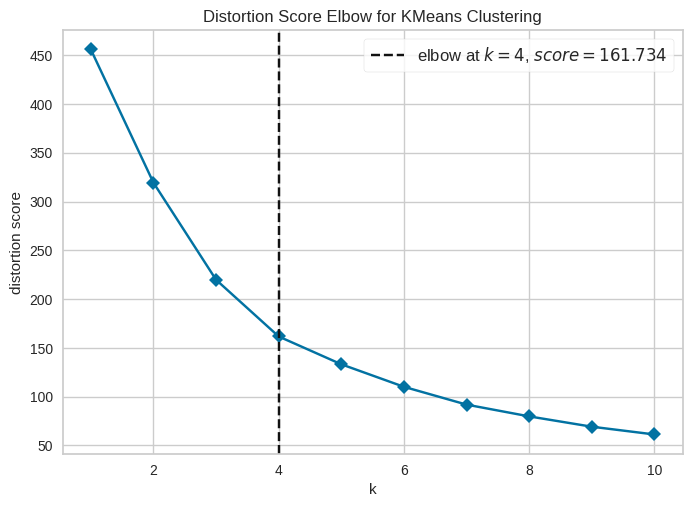

In [28]:
# Usamos el "método del codo" para hallar el número óptimo de clústeres

import warnings
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Desactivar warnings
warnings.filterwarnings("ignore")

# Visualización del codo
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(base_escalada)
visualizer.show()

# Activar warnings de nuevo al finalizar
warnings.filterwarnings("default")

De la anterior gráfica, podemos observar que el mejor número que le conviene a la base de datos es **4 clústeres**.

In [29]:
# Aplicamos el clustering con el algoritmo "K-Means"
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(base_escalada)
# Agregamos los grupos de clustering a la base de datos unificada sin procesar
df_cluster['Cluster'] = y
df_con_clustering['Cluster'] = y
print(df_con_clustering.Cluster.head())

0    3
1    3
2    0
3    0
4    0
Name: Cluster, dtype: int32


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
# Exportamos la base de datos final con la columna de Clustering
df_con_clustering.to_excel('Catedra_Introducción_con_Clustering.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

## **Resultados del Clustering**

In [69]:
# Leemos las bases de datos
df_con_clustering = pd.read_excel('Base_Final_Catedra_Introducción_con_Clustering.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


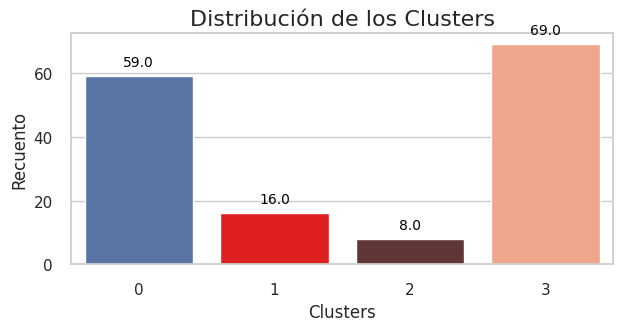

In [59]:
# Definir el tamaño y estilo del gráfico
plt.figure(figsize=(7, 3))
sns.set(style="whitegrid")

# Colores personalizados para los clusters
colores_clusters = ["#4C72B0", "#FF0000", "#682F2F", "#FFA07A"]

# Crear el gráfico de recuento de distribución de clusters
plot = sns.countplot(x = df_con_clustering["Cluster"], palette = colores_clusters)

# Configuración del título y etiquetas de ejes
plot.set_title("Distribución de los Clusters", fontsize=16)
plt.ylabel('Recuento', fontsize=12)
plt.xlabel('Clusters', fontsize=12)

# Añadir etiquetas con el recuento en cada barra del gráfico
for barra in plot.patches:
    plot.annotate(f'{barra.get_height()}',
                  (barra.get_x() + barra.get_width() / 2., barra.get_height()),
                  ha='center', va='center', xytext=(0, 10),
                  textcoords='offset points', fontsize=10, color='black')

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


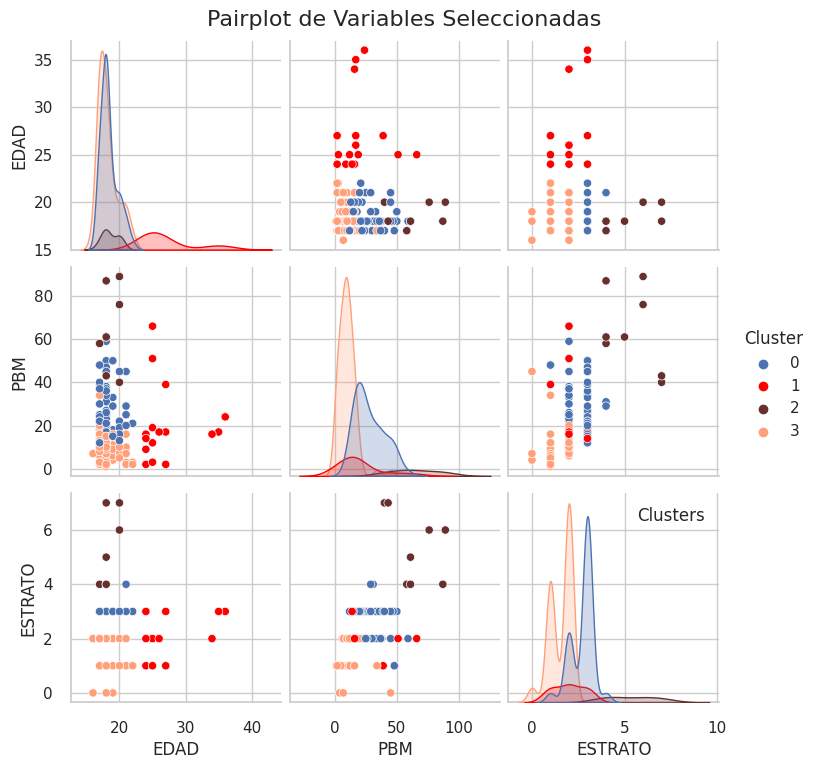

In [60]:
# Definir las columnas para el pairplot
columnas = ['EDAD', 'PBM', 'ESTRATO']

# Crear el pairplot
columnas = ['EDAD', 'PBM', 'ESTRATO']
plot = sns.pairplot(data = df_cluster, hue = 'Cluster', vars = columnas, palette = colores_clusters)

# Configuración del título y leyenda
plot.fig.suptitle("Pairplot de Variables Seleccionadas", y=1.02, fontsize=16)
plt.legend(title='Clusters', loc='upper right')

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


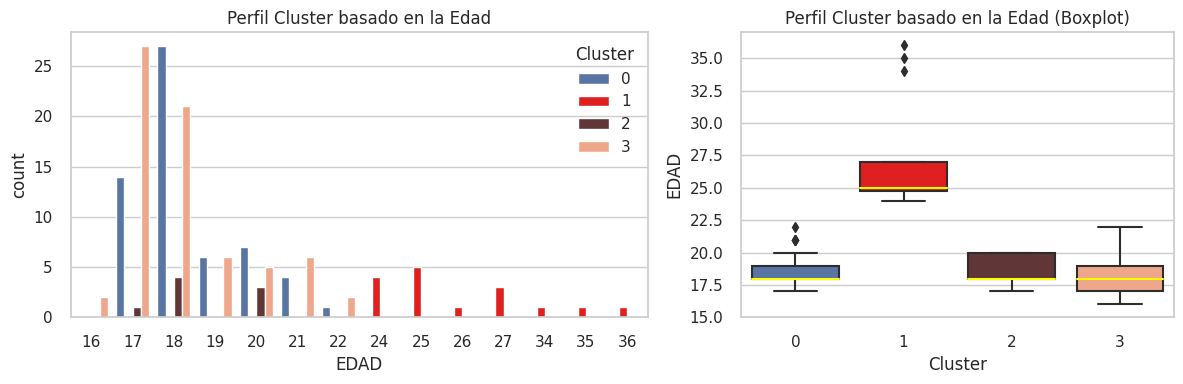

Cluster,0,1,2,3
count,59.000000,16.00000,8.000000,69.000000
mean,18.372881,27.06250,18.625000,18.159420
std,1.258054,4.09013,1.187735,1.461498
min,17.000000,24.00000,17.000000,16.000000
25%,18.000000,24.75000,18.000000,17.000000
50%,18.000000,25.00000,18.000000,18.000000
75%,19.000000,27.00000,20.000000,19.000000
max,22.000000,36.00000,20.000000,22.000000


In [61]:
# Crear la cuadrícula de subgráficos con un tamaño personalizado
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 3])

# Subgráfico para el countplot (gráfica de barras)
ax0 = plt.subplot(gs[0])
countplot = sns.countplot(x='EDAD', hue='Cluster', data=df_cluster, palette=colores_clusters, ax=ax0)
countplot.set_title("Perfil Cluster basado en la Edad")
ax0.legend(title='Cluster')
ax0.set_xlabel('EDAD')

# Subgráfico para el boxplot
ax1 = plt.subplot(gs[1])
boxplot = sns.boxplot(x='Cluster', y='EDAD', data=df_cluster, palette=colores_clusters, medianprops={"color": "yellow"}, ax=ax1)
boxplot.set_title("Perfil Cluster basado en la Edad (Boxplot)")
ax1.set_xlabel('Cluster')
ax1.set_ylabel('EDAD')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

# Mostrar el resumen estadístico
df_cluster['EDAD'].groupby(df_cluster["Cluster"]).describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


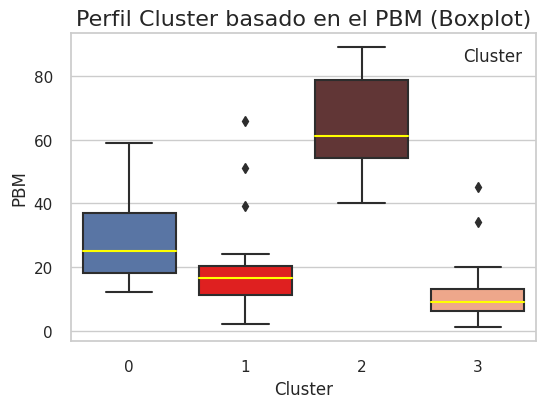

Cluster,0,1,2,3
count,59.000000,16.000000,8.00000,69.000000
mean,28.118644,20.250000,64.37500,9.913043
std,11.862844,17.646529,18.39206,7.085069
min,12.000000,2.000000,40.00000,1.000000
25%,18.000000,11.250000,54.25000,6.000000
50%,25.000000,16.500000,61.00000,9.000000
75%,37.000000,20.250000,78.75000,13.000000
max,59.000000,66.000000,89.00000,45.000000


In [62]:
# Crear la cuadrícula de subgráficos con un tamaño personalizado
fig, ax = plt.subplots(figsize=(6, 4))

# Crear el boxplot
pl = sns.boxplot(x='Cluster', y='PBM', data=df_cluster, palette=colores_clusters, medianprops={"color": "yellow"})

# Configuración del título y leyenda
pl.set_title("Perfil Cluster basado en el PBM (Boxplot)", fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('PBM')
plt.legend(title='Cluster')

# Mostrar el gráfico
plt.show()

# Mostrar el resumen estadístico
df_cluster['PBM'].groupby(df_cluster["Cluster"]).describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


╒══════════╤══════════════════╤═════╤═════╤═════╤═════╤═════╤═════╤════════════╕
│ Número   │ 0                │   1 │   2 │   3 │   4 │   5 │   6 │ 7          │
╞══════════╪══════════════════╪═════╪═════╪═════╪═════╪═════╪═════╪════════════╡
│ Estrato  │ No Estratificado │   1 │   2 │   3 │   4 │   5 │   6 │ No Informa │
╘══════════╧══════════════════╧═════╧═════╧═════╧═════╧═════╧═════╧════════════╛


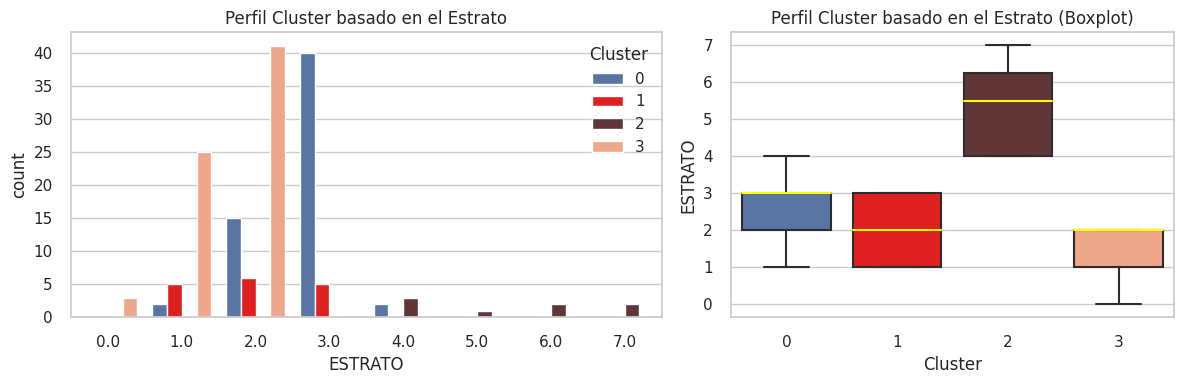

Cluster,0,1,2,3
count,59.000000,16.000000,8.00000,69.000000
mean,2.711864,2.000000,5.37500,1.550725
std,0.588711,0.816497,1.30247,0.582495
min,1.000000,1.000000,4.00000,0.000000
25%,2.000000,1.000000,4.00000,1.000000
50%,3.000000,2.000000,5.50000,2.000000
75%,3.000000,3.000000,6.25000,2.000000
max,4.000000,3.000000,7.00000,2.000000


In [63]:
# Lista de estratos
orden = ['Estrato', 'No Estratificado', '1', '2', '3', '4', '5', '6', 'No Informa']
# Imprimir la tabla horizontalmente
print(tabulate([orden], headers=["Número"] + [f'{i}' for i in range(len(orden))], tablefmt="fancy_grid"))

# Crear la cuadrícula de subgráficos con un tamaño personalizado
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 3])

# Subgráfico para el countplot (gráfica de barras)
ax0 = plt.subplot(gs[0])
countplot = sns.countplot(x='ESTRATO', hue='Cluster', data=df_cluster, palette=colores_clusters, ax=ax0)
countplot.set_title("Perfil Cluster basado en el Estrato")
ax0.legend(title='Cluster')
ax0.set_xlabel('ESTRATO')

# Subgráfico para el boxplot
ax1 = plt.subplot(gs[1])
boxplot = sns.boxplot(x='Cluster', y='ESTRATO', data=df_cluster, palette=colores_clusters, medianprops={"color": "yellow"}, ax=ax1)
boxplot.set_title("Perfil Cluster basado en el Estrato (Boxplot)")
ax1.set_xlabel('Cluster')
ax1.set_ylabel('ESTRATO')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

# Mostrar el resumen estadístico
df_cluster['ESTRATO'].groupby(df_cluster["Cluster"]).describe().T

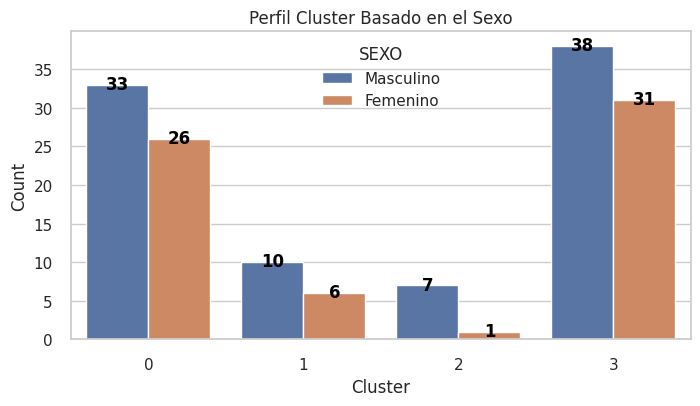

In [76]:
# Crear un gráfico de barras apiladas
plt.figure(figsize=(8, 4))
plot = sns.countplot(x=df_con_clustering["Cluster"], hue=df_con_clustering["SEXO"])

# Añadir título y leyenda
plt.title("Perfil Cluster Basado en el Sexo")
plt.legend(title='SEXO')

# Añadir etiquetas a los ejes
plt.xlabel('Cluster')
plt.ylabel('Count')

# Añadir valor encima de cada barra
for p in plot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    count_value = int(height)  # Convertir la altura a entero
    plt.text(x + width/2, y + height + 0.1, count_value, ha='center', va='center', fontweight='bold', color='black')

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


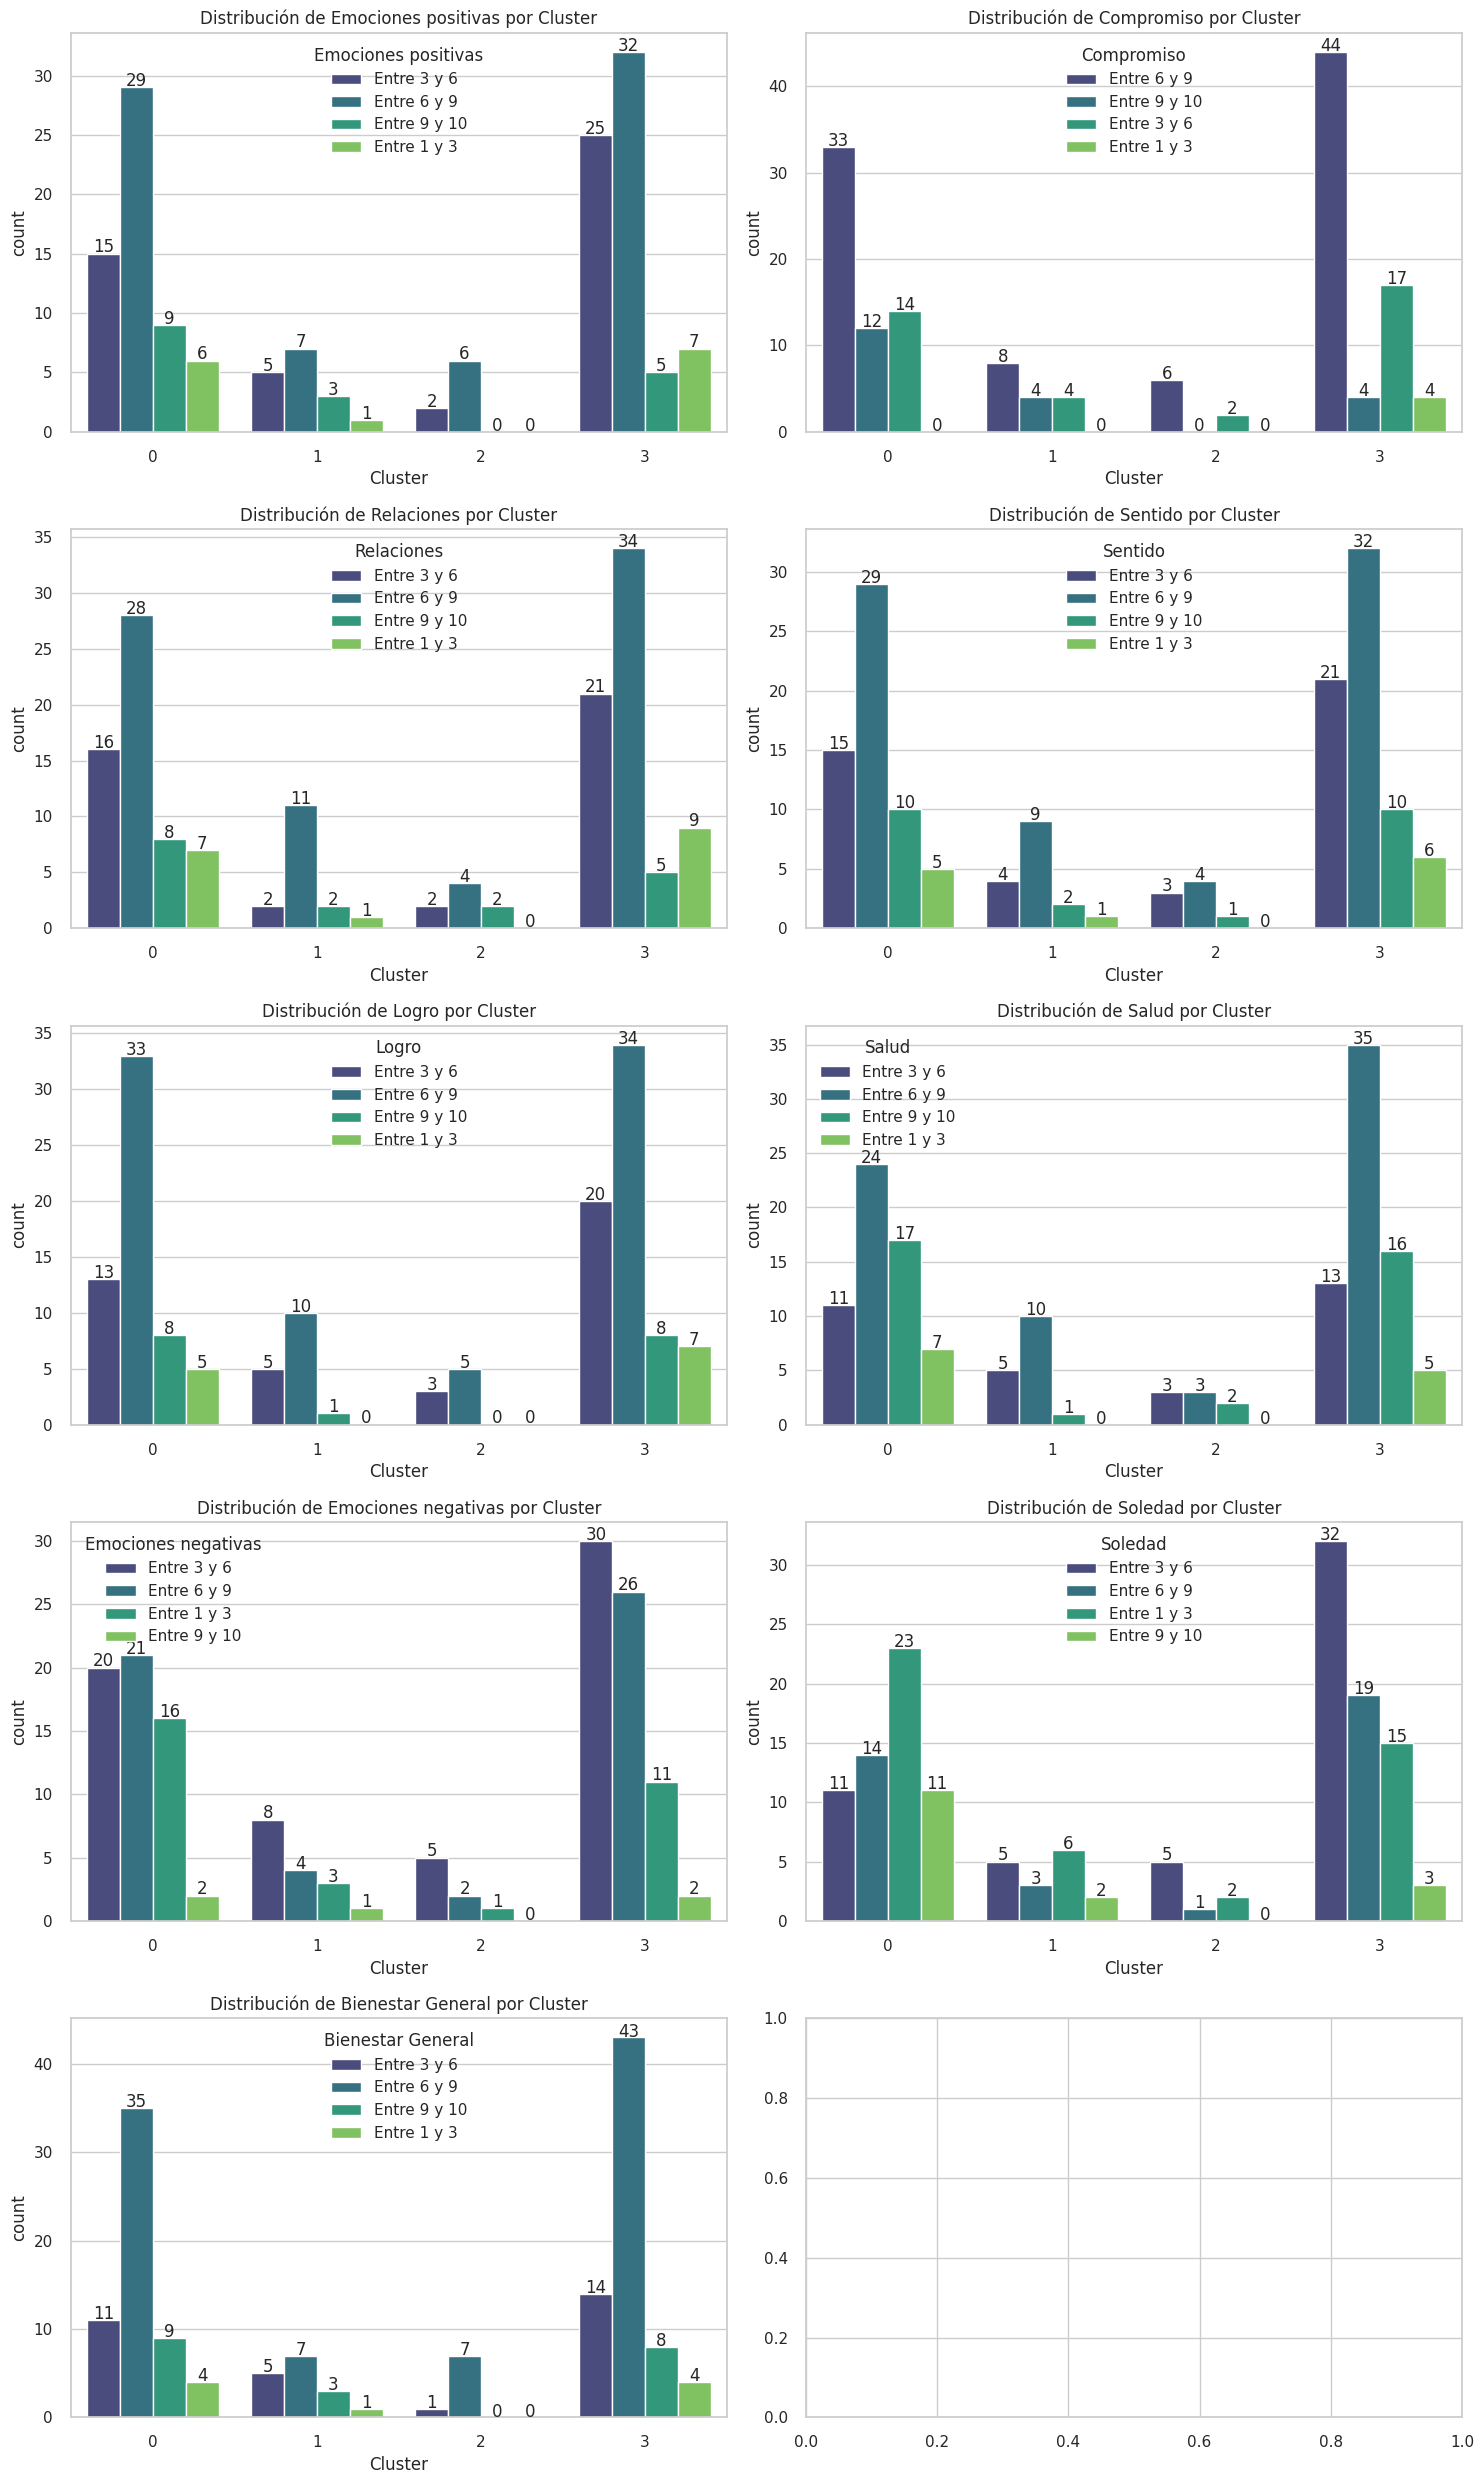

In [64]:
# Seleccionar las columnas relevantes
columnas_emociones = df_con_clustering.columns[14:23]
columna_cluster = 'Cluster'

# Configurar el estilo de seaborn para gráficos más atractivos
sns.set(style="whitegrid")

# Calcular el número de filas y columnas necesarias para la matriz de gráficos
num_filas = len(columnas_emociones) // 2 + len(columnas_emociones) % 2
num_columnas = 2

# Inicializar la matriz de gráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

# Iterar sobre las emociones y crear los gráficos
for i, emocion in enumerate(columnas_emociones):
    fila_actual = i // num_columnas
    col_actual = i % num_columnas

    # Crear un gráfico de barras agrupadas para cada emoción
    sns.countplot(x=columna_cluster, hue=emocion, data=df_con_clustering, ax=axs[fila_actual, col_actual], palette="viridis")

    # Añadir leyenda y título
    axs[fila_actual, col_actual].legend(title=emocion)
    axs[fila_actual, col_actual].set_title(f'Distribución de {emocion} por Cluster')

    # Mostrar el número de frecuencia encima de cada barra
    for p in axs[fila_actual, col_actual].patches:
        height = p.get_height()
        if not pd.isna(height):  # Verificar si la altura no es NaN (por si hay barras sin datos)
            axs[fila_actual, col_actual].text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

# Ajustar el diseño
plt.tight_layout()
plt.show()